<a href="https://www.kaggle.com/code/sunethjayawardana/near-earth-objects-ml-logistic-regression?scriptVersionId=160391870" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv
/kaggle/input/nasa-nearest-earth-objects/neo.csv


 ## 1. Near earth objects

 ![Image of an Astoride](https://cdn.mos.cms.futurecdn.net/eaNog7E2PwANAXxyUtDTac-970-80.jpg.webp)
 
 <font size = "4"> The dataset contains the details about the different objects near earth. This analysis help to understand which objects are harmful to earth using machine learning model.
*  First we will load and view the dataset
*  We will do an EDA and clean the data if there are missing values
*  We will build a machine learning model that will predict the hazardous object to the earth

In [2]:
# Import pandas 

import pandas as pd


# Load dataset
near_objects = pd.read_csv("/kaggle/input/nasa-nearest-earth-objects/neo.csv")

# Inspect data
near_objects.head(5)


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


# 2. Inspecting the dataset

<font size = "4"> Looking at the dataset it is a combination of numerical and other objects. We need to get and understand of the datset by doing a EDA. </font>

In [3]:
# Print summary statistics
near_objects_description = near_objects.describe()
print(near_objects_description)

print('\n')

# Print DataFrame information
near_objects_info = near_objects.info()
print(near_objects_info)

                 id  est_diameter_min  est_diameter_max  relative_velocity  \
count  9.083600e+04      90836.000000      90836.000000       90836.000000   
mean   1.438288e+07          0.127432          0.284947       48066.918918   
std    2.087202e+07          0.298511          0.667491       25293.296961   
min    2.000433e+06          0.000609          0.001362         203.346433   
25%    3.448110e+06          0.019256          0.043057       28619.020645   
50%    3.748362e+06          0.048368          0.108153       44190.117890   
75%    3.884023e+06          0.143402          0.320656       62923.604633   
max    5.427591e+07         37.892650         84.730541      236990.128088   

       miss_distance  absolute_magnitude  
count   9.083600e+04        90836.000000  
mean    3.706655e+07           23.527103  
std     2.235204e+07            2.894086  
min     6.745533e+03            9.230000  
25%     1.721082e+07           21.340000  
50%     3.784658e+07           23.70000

<font size = "4"> The "name","orbiting_body","sentry_objects" and "hazardous" columns has non numerical values. We need to understand the content of these columns. Specially we need to understand the column orbiting_body and sentry_object. </font>

In [4]:
# Print the values and their frequencies 
print(near_objects[["orbiting_body","sentry_object"]].value_counts())



orbiting_body  sentry_object
Earth          False            90836
dtype: int64


<font size = "4"> It is clear that the datset only contains objects near earth and those objects are not sentry objects. Now let's visualize the size of these objects and the relative velocities </font>

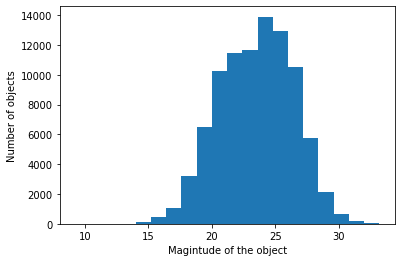

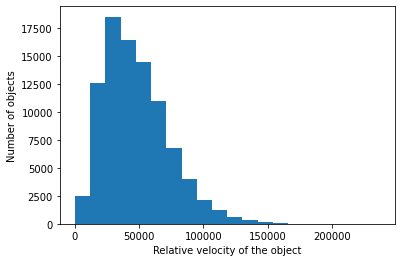

In [5]:
# import matplotlib.pyplot 
import matplotlib.pyplot as plt

# Plot histrogram of size of the object
plt.hist(near_objects["absolute_magnitude"], bins = 20)

# Label the axis
plt.xlabel("Magintude of the object")
plt.ylabel("Number of objects")

# Show histogram
plt.show()

# Plot histogram of the velocity of the object
plt.hist(near_objects["relative_velocity"], bins = 20)

plt.xlabel("Relative velocity of the object")
plt.ylabel("Number of objects")
plt.show()

<font size = "4"> The histogram of magnitude of the objects shows a good gausian distribution. The histogram of the velocity has long right tail. Now we need to get an idea about the connection between the size of the object and the relative velocity. </font>

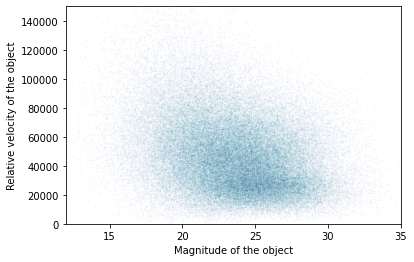

In [6]:
#add random noise to x and y
velocity_jitter = near_objects["relative_velocity"]+np.random.normal(0,2,size=len(near_objects))
magnitude_jitter = near_objects["absolute_magnitude"]+np.random.normal(0,2,size=len(near_objects))
#Define the range of the axis
plt.axis([12,35,0,150000])
# Plot a scatter plot of velocity vs size of the object
plt.plot(magnitude_jitter,velocity_jitter,"o",markersize=1,alpha=0.02)

# label the axis
plt.xlabel("Magnitude of the object")
plt.ylabel("Relative velocity of the object")

# show plot
plt.show()


<font size= "4"> The most of the data is accumilated in a certain region of the scatter plot, but there are some outliers in the plot. We can understand the peaks in these columns if we look at a pmf (Probability mass fucntion) distribution. </font>

  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.7.2-py3-none-any.whl size=12205 sha256=b17baec6904c97a7a970e9799d07004bdeaf1e61f806aa8457166b61b2cdd618
  Stored in directory: /root/.cache/pip/wheels/cb/19/8f/27c45acac2441af53283de1d17fb4af1ad673fdd482f566158
Successfully built empiricaldist


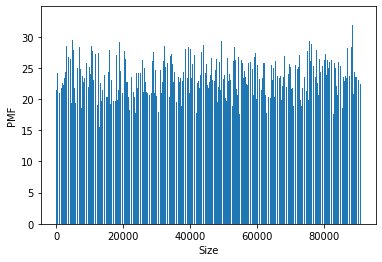

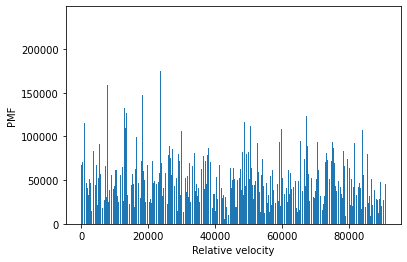

In [7]:
# Install the empiricaldist package for pmf
!pip install empiricaldist

# Load PMF from package
from empiricaldist import Pmf

# find pmf of size of the objects
pmf_size = Pmf(near_objects["absolute_magnitude"])

# Plot a PMF of size
pmf_size.bar(label="absolute_magnitude")

# Label the axes
plt.xlabel("Size")
plt.ylabel("PMF")
plt.show()

# find pmf of velocity of the objects
pmf_velocity = Pmf(near_objects["relative_velocity"])

# Plot a PMF of velocity
pmf_velocity.bar(label="relative_velocity")

# Label the axes
plt.xlabel("Relative velocity")
plt.ylabel("PMF")
plt.show()

# 3. Preprocessing the data

<font size ="4"> After inspecting the dataset we see that there are no missing values in the dataset or any unknown objects, so we dont need to change the values in the dataframe. However, there are some columns that are not nesessary to fit the model. we are going to drop "name","orbiting_body","sentry_object" and "id" columns from the dataset. We need to chnage the "hazardous" column from boolian to numerical value, assuming True=1 and False = 0. </font>

In [8]:
# Droping three columns.
earth_objects = near_objects.drop(["name","orbiting_body","sentry_object","id"],axis = 1)

# Print head of new data frame
earth_objects.head(5)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


In [9]:
# Import numpy
import numpy as np

# Replcace hazardous column with 1 and 0
earth_objects["hazardous"] = np.where(earth_objects["hazardous"]==True,1,0)

# Show the data frame
earth_objects.head(5)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1


# 4. Fitting to the logistic regression model
<font size = "4"> Now everything is in numerical values. We have to take predicting variable as "hazardous" column and others as features. </font>
* First we need to split the data as training and test sets
* Second we need to normalize the data
* Fit the data

In [10]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into train and test sets
near_earth_train, near_earth_test = train_test_split(earth_objects, test_size=0.33, random_state=42)

# Segregate features and labels into separate variables
X_train, y_train = near_earth_train.iloc[:,:-1].values, near_earth_train.iloc[:,-1].values
X_test, y_test = near_earth_test.iloc[:,:-1].values, near_earth_test.iloc[:,-1].values

#Import LogistcRegression, StandardScaler and pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import KFold, cross_val_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", lr.score(X_test,y_test))

# Print the confusion matrix of the lr model
print(confusion_matrix(y_test,y_pred))

Accuracy of logistic regression classifier:  0.90162129703763
[[27027     0]
 [ 2949     0]]


# 5. Visualizing classification model performance

<font size = "4"> Now we have evaluate the model using linear regression. Let us look at the performance of different model if we use different models for the data </font>

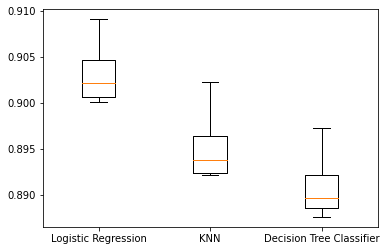

In [11]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

# 6. XGboost to Increase the Model Performance

<font size = "4"> We can use the XGboost to increase the logistic regression model performance </font>

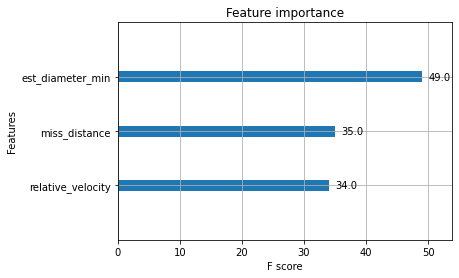

In [12]:
#Import xgboost as xgb
import xgboost as xgb
# Create the DMatrix:
earth_dmatrix = xgb.DMatrix(data=earth_objects.iloc[:,:-1], label=earth_objects.iloc[:,-1])

# Create the parameter dictionary: params
params = {"objective":'binary:logistic', "max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=earth_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()


<font size = "4"> We can see the most important feature is min diameter of the object  </font>